In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from IPython.display import Image
from imutils import paths
import numpy as np
import cv2
import os

In [3]:
def extract_histogram(image, bins=(8, 8, 8)):
    hist = cv2.calcHist([image], [0, 1, 2], None, bins, [0, 256, 0, 256, 0, 256])
    cv2.normalize(hist, hist)
    return hist.flatten()

In [4]:
imagePaths = sorted(list(paths.list_images('train')))
data = []
labels = []

for (i, imagePath) in enumerate(imagePaths):
    image = cv2.imread(imagePath, 1)
    label = imagePath.split(os.path.sep)[-1].split(".")[0]
    hist = extract_histogram(image)
    data.append(hist)
    labels.append(label)

0


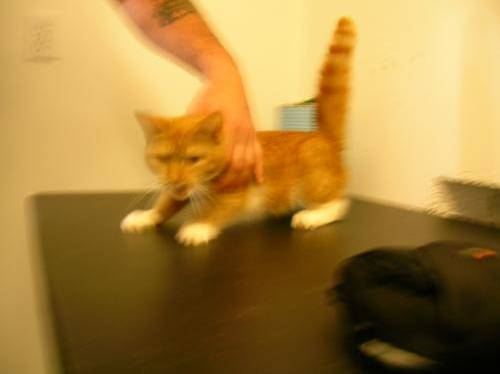

In [5]:
le = LabelEncoder()
labels = le.fit_transform(labels)
print(labels[0])
Image(filename=imagePaths[0])

In [6]:
(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(data), labels, test_size=0.25, random_state=3)

In [7]:
model = LinearSVC(random_state = 3, C = 1.05)
model.fit(trainData, trainLabels)

LinearSVC(C=1.05, random_state=3)

In [8]:
predictions = model.predict(testData)

In [9]:
print(classification_report(testLabels, predictions, target_names=le.classes_))

              precision    recall  f1-score   support

         cat       0.58      0.71      0.64       129
         dog       0.59      0.45      0.51       121

    accuracy                           0.58       250
   macro avg       0.59      0.58      0.57       250
weighted avg       0.59      0.58      0.58       250



In [10]:
from sklearn.metrics import f1_score
predictions = model.predict(testData)
f1_score(testLabels, predictions, average='macro')

0.57416142557652

In [11]:
model.coef_[0][130]

-0.09283733593097723

In [12]:
model.coef_[0][291]

-0.07455155139880791

In [13]:
model.coef_[0][37]

-0.036796595331287874

In [14]:
singleImage = cv2.imread('test/cat.1006.jpg')
histt = extract_histogram(singleImage)
histt2 = histt.reshape(1, -1)
prediction = model.predict(histt2)

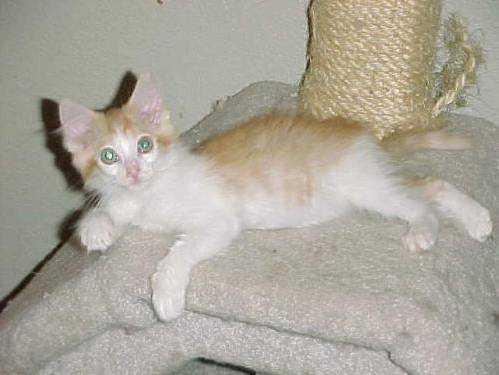

In [15]:
Image(filename='test/cat.1006.jpg')

In [16]:
prediction

array([1])

In [18]:
singleImage = cv2.imread('test/dog.1046.jpg')
histt = extract_histogram(singleImage)
histt2 = histt.reshape(1, -1)
prediction = model.predict(histt2)

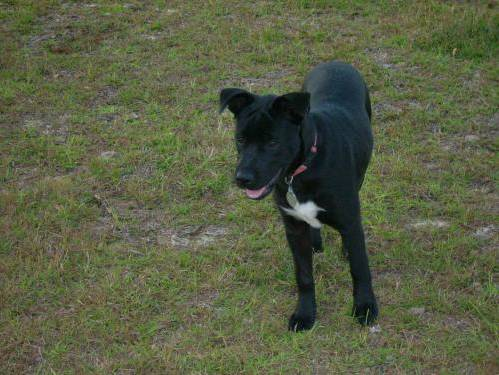

In [19]:
Image(filename='test/dog.1046.jpg')

In [20]:
prediction

array([1])

In [21]:
singleImage = cv2.imread('test/dog.1043.jpg')
histt = extract_histogram(singleImage)
histt2 = histt.reshape(1, -1)
prediction = model.predict(histt2)

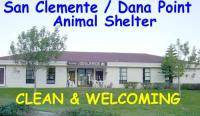

In [22]:
Image(filename='test/dog.1043.jpg')

In [23]:
prediction

array([1])

In [24]:
singleImage = cv2.imread('test/dog.1017.jpg')
histt = extract_histogram(singleImage)
histt2 = histt.reshape(1, -1)
prediction = model.predict(histt2)

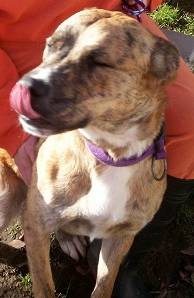

In [26]:
Image(filename='test/dog.1017.jpg')

In [27]:
prediction

array([0])